# Projekt indywidualny: analiza parametrów muzycznych w twórczości Taco Hemingwaya na podstawie danych z serwisu Spotify

## Wstęp

W czasach, kiedy internet szturmem przejmuje wszystkie aspekty naszego życia, niemal wszystko i wszyscy generują dane, o których nie śniło się analitykom jeszcze kilkanaście lat temu. Muzyka nie jest tu wyjątkiem. Spotify, będący najpopularniejszą aplikacją do streamingu muzyki, opisuje każdy utwór ze swoich zasobów listą zmiennych, które dotyczą jego charakterystyk audio. 

Postanowiłam wykorzystać tę wiedzę, aby dokonać analizy twórczości Taco Hemingwaya na przestrzeni lat. Pomysł zaczerpnęłam z [artykułu](https://www.chadbixby.com/2018/08/30/spotify/), w którym opisana jest podobna analiza dla twórczości Kanyego Westa. Oryginalna analiza została wykonana w języku R - ja zdecydowałam się użyć Pythona i jego bibliotek do eksporacyjnej analizy danych oraz pakietu [spotipy](https://spotipy.readthedocs.io/en/latest/) do sparsowania danych pobranych z API Spotify.

### Pobranie danych

Aby uzyskać interesujące mnie dane, napisałam skrypt w Pythonie, który pyta użytkownika o oczekiwanego artystę, a później zapisuje do pliku .csv dane dot. piosenek z albumów wskazanych przez użytkownika.

### Parametry, którymi Spotify opisuje utwory

* **acousticness** - w skali od 0.0 do 1.0 określa pewność, czy piosenka jest akustyczna (1.0 - zdecydowanie akustyczna),
* **danceability** - w skali od 0.0 do 1.0 określa, jak bardzo piosenka nadaje się do tańca. Przy określaniu tej zmiennej wzięto pod uwagę m. in. tempo, rytm czy siłę bitu (1.0 - najbardziej nadająca się do tańca),
* **duration_ms** - czas trwania piosenki w milisekundach,
* **energy** - w skali od 0.0 do 1.0 określa, jak postrzegana jest intensywność piosenki - najbardziej energetyczne piosenki są zwykle postrzegane jako szybkie i głośne (1.0 - bardzo energetyczna, np. death metal, 0.0 - mało energetyczna, np. muzyka klasyczna),
* **instrumentalness** - w skali od 0.0 do 1.0 określa prawdopodobieństwo, że piosenka nie zawiera wokalu (0.0 - zawiera wokal, 1.0 - utwór instrumentalny),
* **key** - tonacja utworu (-1 = brak, 0 = C, 1 = C♯/D♭, 2 = D, etc.)
* **liveness** - w skali od 0.0 do 1.0 określa prawdopodobieństwo, czy piosenka była wykonywana przed publicznością (0.0 - brak publiczności, > 0.8 - duże prawdopodobieństwo, że piosenka była wykonywana na żywo),
* **loudness** - głośność utworu w decybelach (od -60dB do 0dB),
* **mode** - skala utworu (1 - durowa, 0 - molowa),
* **speechiness** - w skali od 0.0 do 1.0 określa obecność słowa mówionego w utworze (< 0.33 - muzyka, <0.33, 0.66> - muzyka rap, > 0.66 - nagranie mówione),
* **tempo** - tempo piosenki (beats/minute),
* **valence** - w skali od 0.0 do 1.0 określa "muzyczną pozytywność przekazaną w utworze". Utwory mające wysoką wartość parametru są bardziej pozytywne niż te mające niską.

### Albumy Taco Hemingwaya

**Albumy studyjne**
* *Marmur* (2016)
* *Soma 0,5 mg* (2018 wraz z Quebonafide)
* *Cafe Belga* (2018)

**Minialbumy**
* *Trójkąt Warszawski* (2014)
* *Umowa o dzieło* (2015)
* *Wosk* (2016)
* *Szprycer* (2017)
* *Flagey* (2018)

## Wczytanie danych

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# konfiguracja wyświetlania wykresów
plt.rcParams['figure.dpi'] = 90

In [3]:
data = pd.read_csv('../data/taco_tracks.csv', parse_dates=['release_date'])
data.head()

,name,artist,album,release_date,spotify_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Café Belga,Taco Hemingway,Café Belga,2018-07-13,1RgUcHLTLSMiNG941CYzQL,56,0.460,0.670,249653,0.607,0.000002,8,0.3840,-7.606,1,0.164,174.017,0.246
1,ZTM,Taco Hemingway,Café Belga,2018-07-13,0kF9dFTuO9G2IpcDcPMKxQ,60,0.369,0.816,279947,0.560,0.000000,10,0.4740,-7.602,0,0.178,139.022,0.632
2,Wszystko Na Niby,Taco Hemingway,Café Belga,2018-07-13,48A8IJh1Ggc8wfWwzG5yrk,55,0.410,0.660,258187,0.534,0.000000,8,0.4940,-9.774,1,0.224,78.006,0.537
3,Reżyseria: Kubrick,Taco Hemingway,Café Belga,2018-07-13,1V0h7CzbB9AT8LZRzOCdTI,52,0.454,0.674,211813,0.504,0.000000,1,0.3080,-5.457,0,0.387,181.625,0.320
4,2031,Taco Hemingway,Café Belga,2018-07-13,3wvhIkvzZKCab1FpZXkWI7,53,0.225,0.859,299547,0.524,0.000000,5,0.0922,-8.450,1,0.351,138.027,0.700


In [4]:
data.shape  # ilość obiektów i atrybutów

(89, 18)

In [18]:
data.isna().sum().sum()  # ilość brakujących wartości

0

Dostępne mam informacje nt. 89 utwórów. Dane są pełne, nie ma żadnych braków.

In [5]:
data.describe()  # przegląd statystyk poszczególnych atrybutów

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,49.235955,0.429236,0.719708,221392.764045,0.574045,0.010495,5.752809,0.230596,-9.526360,0.471910,0.258929,118.842416,0.493571
std,5.338587,0.223482,0.116565,56847.925091,0.107021,0.081298,3.870873,0.172868,2.628951,0.502039,0.137620,29.633544,0.192166
min,38.000000,0.045200,0.264000,39282.000000,0.273000,0.000000,0.000000,0.064200,-18.432000,0.000000,0.041800,60.354000,0.066900
25%,45.000000,0.240000,0.668000,198427.000000,0.506000,0.000000,2.000000,0.104000,-10.647000,0.000000,0.166000,94.987000,0.351000
50%,49.000000,0.420000,0.746000,221719.000000,0.575000,0.000000,6.000000,0.151000,-9.297000,0.000000,0.248000,111.920000,0.496000
75%,53.000000,0.584000,0.792000,257153.000000,0.641000,0.000004,9.000000,0.337000,-7.477000,1.000000,0.306000,140.138000,0.657000
max,63.000000,0.924000,0.924000,338155.000000,0.842000,0.750000,11.000000,0.795000,-5.457000,1.000000,0.911000,190.083000,0.875000


## Korelacja między zmiennymi w zbiorze

In [6]:
features = [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'tempo',
    'valence',
    'duration_ms'
]
data1 = data.loc[:, features]

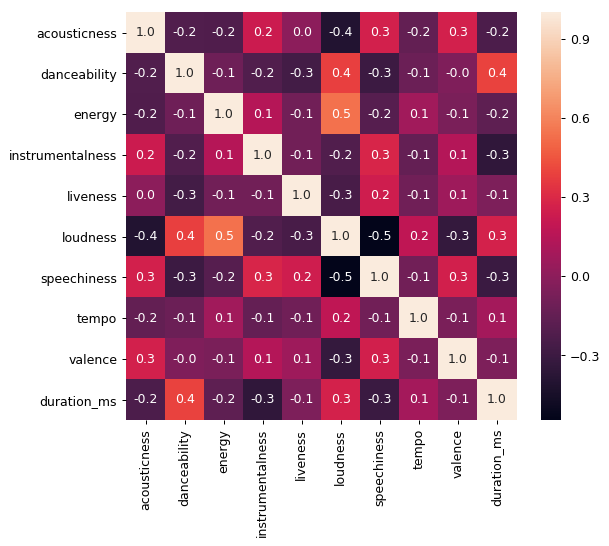

In [7]:
plt.figure(figsize=(7,6))
sns.heatmap(data1.corr(), annot=True, fmt='.1f')

### Wnioski

Macierz korelacji pokazuje, że wszystkie korelacje zawierają się w przedziale <-0.5, 0.5>.

**Umiarkowanie skorelowane dodatnio są pary:**
* danceability i loudness,
* energy i loudness,
* danceability i duration_ms.

Wraz z głośnością utworu, zauważalny jest wzrost taneczności i energii utworu. Dłuższe utwory są też nieco bardziej odpowiednie do tańca.

**Umiarkowanie skorelowane ujemnie są pary:**
* loudness i acousticness,
* loudness i speechiness.

Dla głośniejszych piosenek prawdopodobieństwo, że są one akustyczne lub są zwykłą mową ludzką, jest mniejsze.

W pozostałych przypadkach koleracja oscyluje wokół zera i nie daje istotnych wniosków.

## Rozkład atrybutów w zbiorze danych

In [8]:
def draw_distribution(data, group_by, feature):
    def vertical_mean_line(x, **kwargs):
        plt.axvline(0.5, **kwargs)
        
    plot = sns.FacetGrid(data,
                         row=group_by,
                         height=2,
                         aspect=4)
    plot.map(sns.distplot,
            feature,
            hist=False,
            rug=True,
            color='purple',
            kde_kws={
                'shade': True
            })
    plot.map(vertical_mean_line, feature)
    plot.fig.subplots_adjust(top=0.95)
    plot.fig.suptitle('Rozkład {0} na przestrzeni albumów Taco Hemingwaya'.format(feature), fontsize=16)
    plt.xlim(0, 1)

In [9]:
def draw_mean_barplot(data, group_by, feature, title):
    mean_feature = data.groupby(group_by).mean().sort_values(by=feature)
    plt.figure(figsize=(8,5))
    d = sns.barplot(data=mean_feature,
                   x=mean_feature.index,
                   y=mean_feature[feature],
                   palette='RdPu')
    d.set_xticklabels(d.get_xticklabels(),
                      rotation=70)
    mean_value = data[feature].mean()
    print('Średnia wartość dla wszystkich danych: ', mean_value)
    d.axhline(y=mean_value,
              linestyle='-.')
    plt.title(title)

### danceability

In [10]:
chosen_feature = 'danceability'
chosen_data = data.loc[:, ['album', chosen_feature]]
chosen_data[chosen_feature] = data[chosen_feature] * data['duration_ms']

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


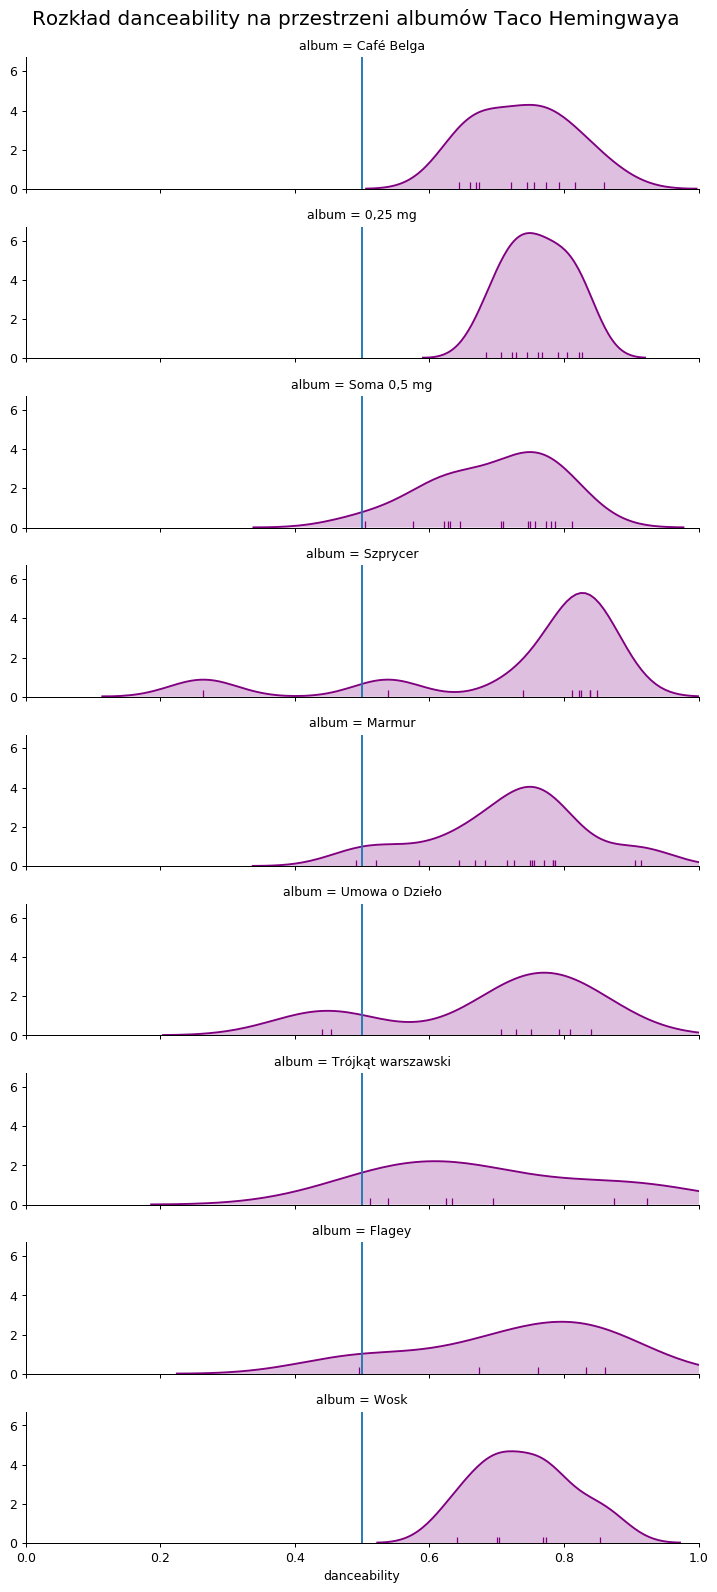

In [11]:
draw_distribution(data, 'album', chosen_feature)

#### Wnioski

Pozioma niebieska linia pokazuje środek skali. Spoglądając na rozkład taneczności na poszczególnych płytach można powiedzieć, że każda z płyt jest bardziej taneczna niż nie. Najbardziej różnorodnymi pod kątem tej zmiennej są albumy *Trójkąt warszawski*, *Flagey* i *Umowa o dzieło*.

Dystrybucja zmiennej pokazuje także, że w przypadku *Szprycera* większość piosenek jest do siebie zbliżona w kwestii taneczności poza dwiema, które zdecydowanie odstają.

### Średnia wartość danceability dla albumów

Dla każdej piosenki wyznaczyłam całościową wartość danceability, mnożąc oryginalną wartość atrybutu przez długość piosenki w ms - długość piosenki jest w tym przypadku wagą. Po obliczeniu średniej arytmetycznej z nowych wartości dla każdego albumu otrzymałam de facto **średnią ważoną**.

Średnie te są przedstawione na poniższym wykresie, a niebieska przerywana linia jest globalną średnią ważoną dla wszystkich danych.

Średnia wartość dla wszystkich danych:  161919.63691011237


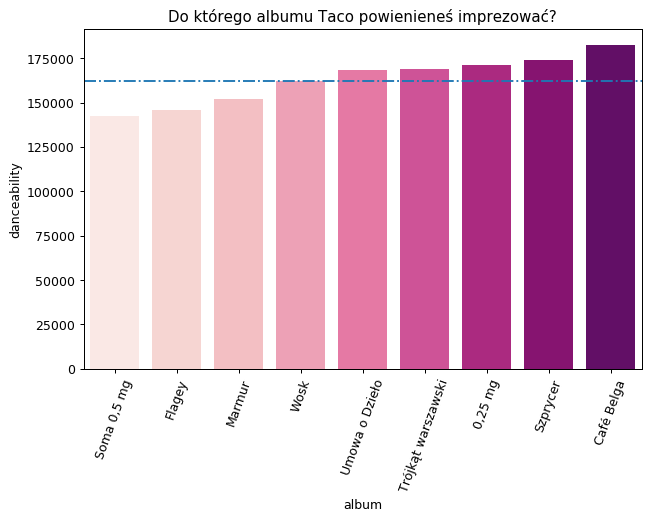

In [12]:
draw_mean_barplot(chosen_data, 'album', chosen_feature, 'Do którego albumu Taco powienieneś imprezować?')

#### Wnioski

Najmniej taneczną płyta jest *Soma 0,5 mg* nagrana z Quebonafide pod szyldem Taconafide. Najbardziej tanecznym wydawnictwem jest najnowsza płyta *Cafe Belga* - ciekawostką jest fakt, że druga najmniej taneczna płyta - *Flagey* - została wydana dokładnie w tym samym czasie jako bonusowy materiał. Podobnie wygląda sytuacja z *0,25 mg*, które jest bonusowym materiałem do *Somy 0,5 mg*, a wykazuje się o wiele wyższym wskaźnikiem danceability (prawdopodobnie dlatego, że duża część utworów to remiksy).

Można powiedzieć, że album *Wosk* jest najbardziej reprezentacyjna pod kątem taneczności, ponieważ jej średnia taneczność utrzymuje się na poziomie średniej taneczności dla wszystkich utworów Taco.

### 10 najbardziej tanecznych piosenek Taco Hemingwaya

In [13]:
data.sort_values(by=chosen_feature, ascending=False).loc[:, ['name', 'album', chosen_feature]][:10]

,name,album,danceability
77,900729,Trójkąt warszawski,0.924
54,Świat Jest WFem,Marmur,0.915
56,Tsunami Blond,Marmur,0.906
71,Szlugi I Kalafiory,Trójkąt warszawski,0.875
79,Pokédex,Flagey,0.861
4,2031,Café Belga,0.859
87,515,Wosk,0.854
38,Chodź,Szprycer,0.849
68,Awizo,Umowa o Dzieło,0.840
37,Nostalgia,Szprycer,0.839


### Czy muzyka Taco Hemingwaya jest pozytywna?

In [14]:
chosen_feature = 'valence'
chosen_data = data.loc[:, ['album', chosen_feature]]
chosen_data[chosen_feature] = data[chosen_feature] * data['duration_ms']

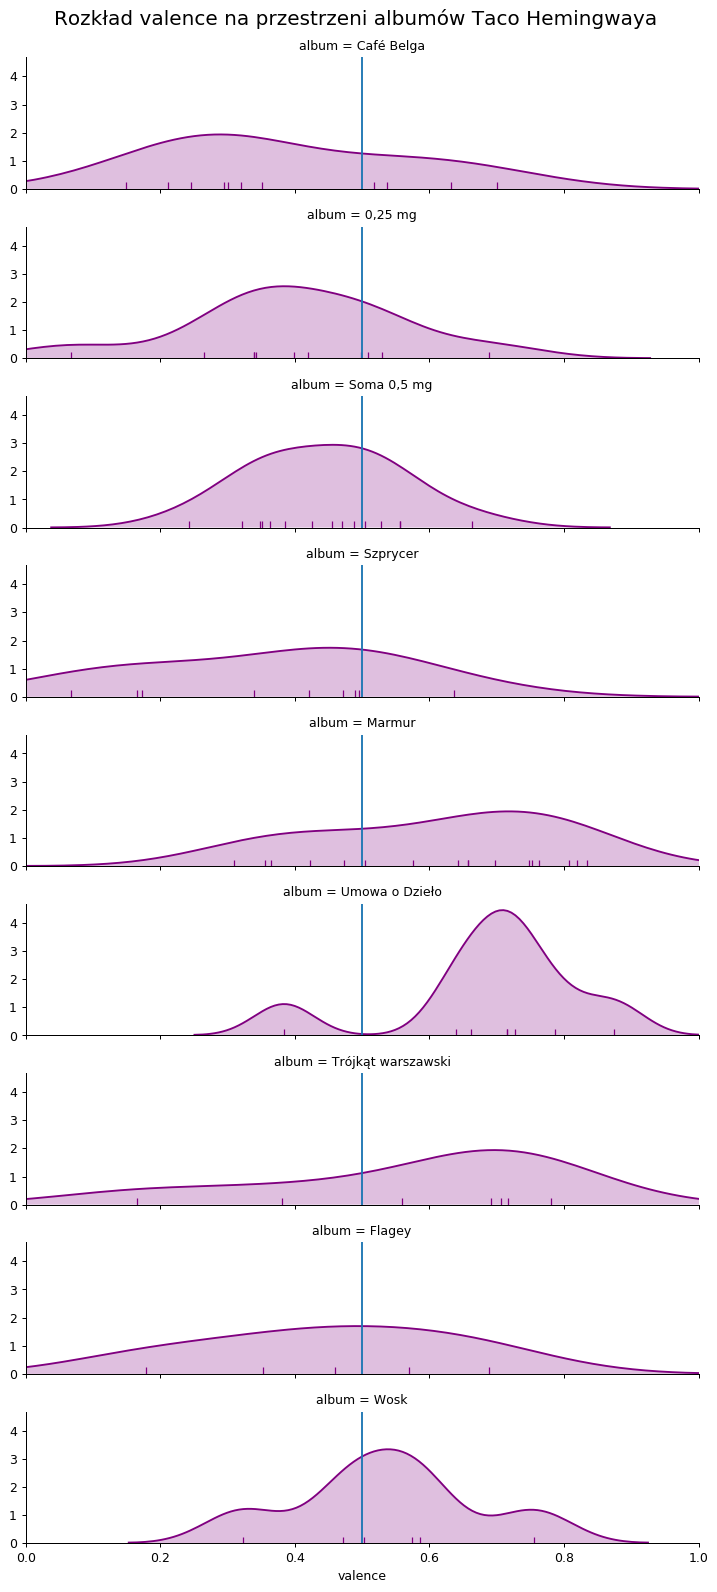

In [15]:
draw_distribution(data, 'album', chosen_feature)

#### Wnioski

Spoglądając na rozkład atrybutu, można powiedzieć, że większość albumów Taco ma wydźwięk negatywny. Najbardziej pozytywnymi albumami są *Trójkąt warszawski*, *Umowa o dzieło* i *Marmur*. Wykresy dystrybucji pokazują, że na niemal wszystkich płytach piosenki są bardzo zróżnicowane pod kątem pozytywności.

### Średnia wartość valence dla albumów

Metodologia zastosowana tu jest analogiczna, jak w przypadku szukania średniej wartości danceability dla albumów.

Średnia wartość dla wszystkich danych:  108687.53539775277


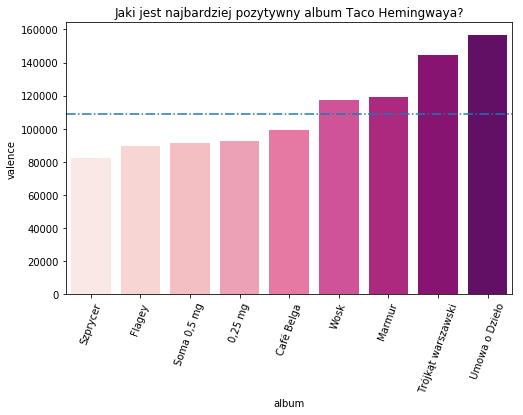

In [38]:
draw_mean_barplot(chosen_data, 'album', chosen_feature, 'Jaki jest najbardziej pozytywny album Taco Hemingwaya?')

#### Wnioski

Najmniej pozytywnym albumem Taco jest *Szprycer*, najbardziej - co nie jest zaskoczeniem, biorąc pod uwagę rozkład badanej cechy - *Umowa o dzieło*. Żaden z albumów nie ma średniej wartości cechy valence na poziomie odpowiadającym średniej globalnej.

Dwa najbardziej pozytywne albumy Taco zostały wydane jako dwa pierwsze w jego karierze.

Warto zwrócić uwagę, na pary *Soma 0,5 mg* i *0,25 mg* oraz *Wosk* i *Marmur*, które mają bardzo porównywalne wartości średnie cechy. Moim zdaniem dzieje się tak, ponieważ w obu przypadkach płyty były wydane w odstępie kilkunastu tygodni i prezentują jeden etap kariery Taco.

### 10 najbardziej pozytywnych piosenek Taco Hemingwaya

In [39]:
data.sort_values(by=chosen_feature, ascending=False).loc[:, ['name', 'album', chosen_feature]][:10]

,name,album,valence
65,Następna stacja,Umowa o Dzieło,0.875
55,Świecące Prostokąty,Marmur,0.835
47,Witaj W Hotelu Marmur,Marmur,0.820
62,Deszcz Na Betonie (?),Marmur,0.807
63,Od Zera,Umowa o Dzieło,0.787
72,"Marsz, Marsz",Trójkąt warszawski,0.781
58,Żywot,Marmur,0.763
86,Wiatr,Wosk,0.755
60,Jak Cień,Marmur,0.752
51,Portier!,Marmur,0.748


Ciekawostką jest fakt, że w top 10 najbardziej pozytywnych piosenek jest aż 6 utworów z *Marmuru*, który jest dopiero trzecim najbardziej pozytywnym albumem wg. analizy przeprowadzonej wcześniej.

## Które albumy są do siebie najbardziej podobne? Grupowanie hierarchiczne i dendrogram

In [22]:
import scipy.cluster.hierarchy as shc
from copy import deepcopy

In [41]:
data2 = deepcopy(data)
features = [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'tempo',
    'valence'
]

In [42]:
for f in features:
    data2[f] = data2[f] * data2['duration_ms']

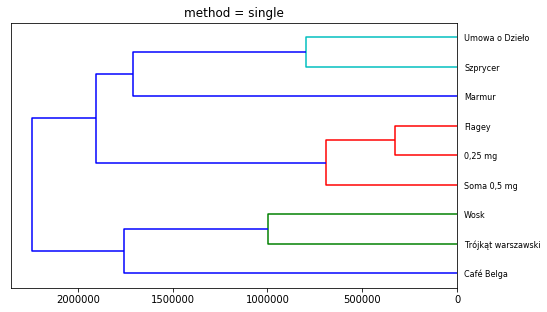

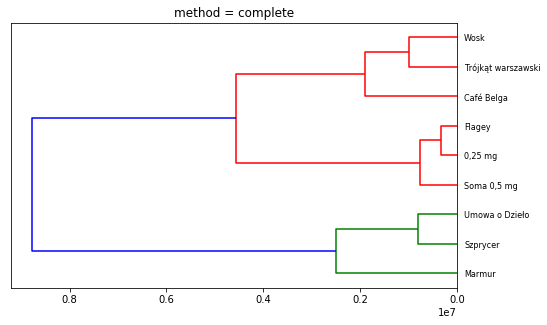

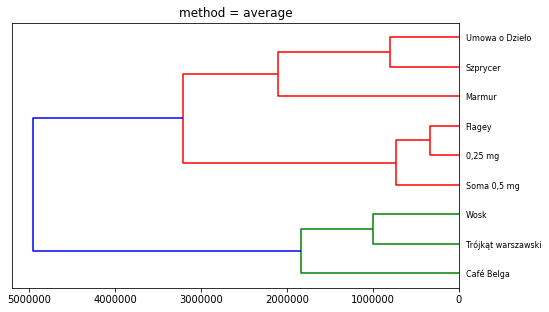

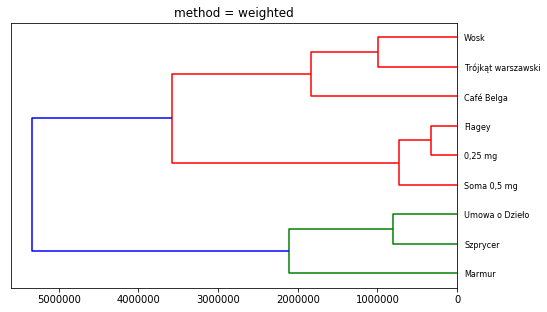

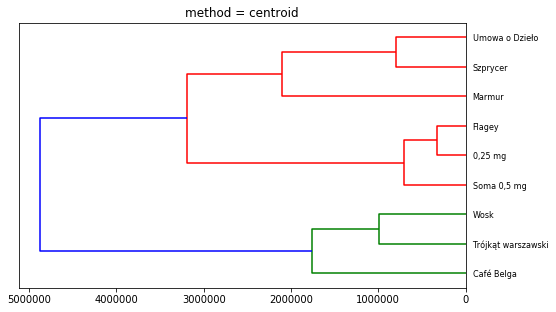

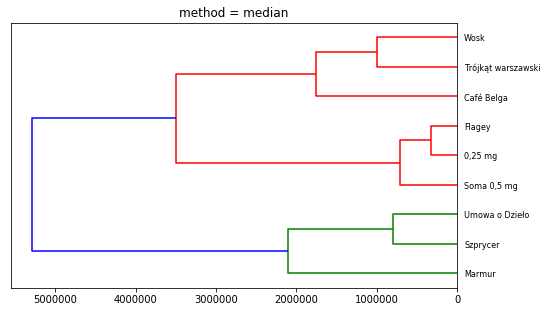

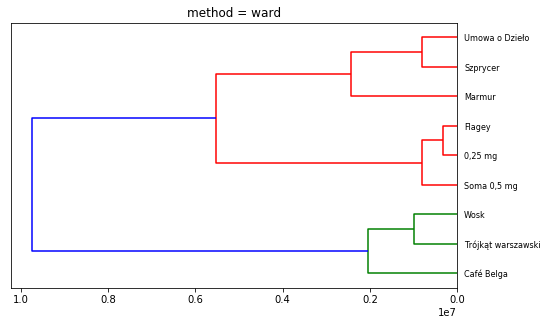

In [61]:
methods = [
    'single',
    'complete',
    'average',
    'weighted',
    'centroid',
    'median',
    'ward'
]

dend = data2.groupby('album').mean()

for i, m in enumerate(methods):
    plt.figure(figsize=(8,40))
    plt.subplot(7, 1, i+1)
    plt.title('method = ' + m)
    dendrogram = shc.dendrogram(shc.linkage(dend, method=m),
                            #leaf_rotation=90,
                            leaf_font_size=8,
                            labels=dend.index,
                            orientation="left")

### Wnioski

Grupowianie hierarchiczne przy użyciu prawie wszystkich metryk dzieli albumy na trzy grupy:
* *Wosk*, *Trójkąt warszawski* i *Cafe Belga*,
* *Flagey*, *0,25 mg* i *Soma 0,5 mg*,
* *Umowa o dzieło*, *Szprycer* i *Marmur*.

Grupowanie hierarchiczne nie daje żadnych sensownych wniosków, ponieważ wyłonione grupy nie mają ze sobą nic więcej wspólnego. Można co prawda powiedzieć, że w drugiej grupie znajdują się trzy z czterech najnowszych wydawnictw, ale znowu *Cafe Belga* znajduje się w innym klastrze (z płytami z 2016 i 2015).

Ciekawy wynik daje metryka *single*, ponieważ wyróżnia ona dwa oddzielne klastry dla *Marmuru* i *Cafe Belga* - co ciekawe, są to dwa jedyne solowe pełne albumy Taco (czyli nie EP-ki).

## Rozkład popularności twórczości Taco Hemingwaya na Spotify (stan z dn. 27 maja 2019)

Popularność danej piosenki determinują dwa czynniki: całkowita ilość odtworzeń w porównaniu do innych oraz **jak dawne są to odtworzenia**. Przez to z czasem, kiedy piosenka przestaje być słuchana z taką częstotliwością jak wcześniej, jej popularność spada.

Co więcej, jeśli na Spotify dostępne są **dwie różne wersje** danej piosenki (np. wersja z singla i z albumu), Spotify traktuje je jako **dwa różne utwory** (chociaż dane dot. charakterystyki muzycznej są takie same). W swoich danych ograniczyłam się do piosenek z albumów i EP, pomijając single. Przykładem jest popularność utworu *Tamagotchi* w wersji singlowej i albumowej (odpowiednio 58 i 57).

mu=49.235955056179776, sigma=5.308510174017092


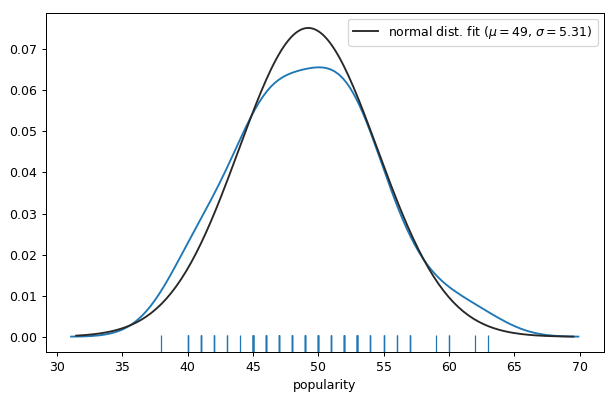

In [71]:
from scipy import stats

plt.figure(figsize=(8,5))
sns.distplot(data.popularity, rug=True, hist=False, fit=stats.norm)
(mu, sigma) = stats.norm.fit(data.popularity)
print("mu={0}, sigma={1}".format(mu, sigma))
plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])

Na wykresie przedstawiony jest faktyczny rozkład popularności piosenek Taco Hemingwaya (na niebiesko) i rozkład normalny (na czarno). Wartość oczekiwana wynosi 49, a odchylenie stadardowe 5,31.

Ponieważ rozkłady są do siebie podobne, przybliżam rozkład faktyczny rozkładem normalnym i zgodnie z **zasadą trzech sigm** ustalam, że za popularne przyjmę piosenki, które mają wartość większą od oczekiwanej o co najmniej jedną sigma. Daje mi to ok. 15,8% obserwacji.

In [72]:
popular_data = deepcopy(data)
popular_data['is_popular'] = popular_data.popularity > mu+sigma
print('Ilość najpopularniejszych piosenek:', popular_data[popular_data.is_popular].shape[0])
popular_data[popular_data.is_popular].head()

Ilość najpopularniejszych piosenek: 13


,name,artist,album,release_date,spotify_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,is_popular
0,Café Belga,Taco Hemingway,Café Belga,2018-07-13,1RgUcHLTLSMiNG941CYzQL,56,0.460,0.670,249653,0.607,0.000002,8,0.384,-7.606,1,0.164,174.017,0.246,True
1,ZTM,Taco Hemingway,Café Belga,2018-07-13,0kF9dFTuO9G2IpcDcPMKxQ,60,0.369,0.816,279947,0.560,0.000000,10,0.474,-7.602,0,0.178,139.022,0.632,True
2,Wszystko Na Niby,Taco Hemingway,Café Belga,2018-07-13,48A8IJh1Ggc8wfWwzG5yrk,55,0.410,0.660,258187,0.534,0.000000,8,0.494,-9.774,1,0.224,78.006,0.537,True
5,Fiji,Taco Hemingway,Café Belga,2018-07-13,2CdCs9y04oDuYCF4ewNzI7,63,0.197,0.774,242560,0.813,0.002330,5,0.122,-5.569,0,0.122,104.996,0.351,True
15,8 kobiet - Remix,TACONAFIDE,"0,25 mg",2018-04-23,5s6jooT9ZcUjjD5qVx9B5K,62,0.479,0.723,270813,0.571,0.000000,8,0.112,-7.642,1,0.138,140.060,0.265,True


## Czy najpopularniejsze piosenki Taco mają podobne parametry muzyczne? Analiza głównych składowych

Aby ustalić, czy wybrane w poprzednim punkcie najpopularniejsze piosenki Taco Hemingwaya mają podobne parametry muzyczne, używam analizy głównych składowych. Analizie poddaję atrybuty audio, ale przed właściwą analizą dokonuję usunięcia wartości odstających i standaryzacji danych.

In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [76]:
# wstępny wybór danych
features = [
    'acousticness',
    'danceability',
    'duration_ms',
    'energy',
    'instrumentalness',
    'key',
    'liveness',
    'loudness',
    'mode',
    'speechiness',
    'tempo',
    'valence'
]
data3 = popular_data.loc[:, features + ['is_popular']]
print(data3.shape)

(89, 13)


In [84]:
# usunięcie outliers
z = np.abs(stats.zscore(data3.loc[:, features]))
df = data3[(z < 3).all(axis=1)]
print(df.shape)

x = df.loc[:, features].values  # wybór danych do analizy: wszystkie obserwacje i zmienne podane w features
y = df.loc[:, ['is_popular']].values  # czy piosenka jest zaliczana do popularnych
x = StandardScaler().fit_transform(x)  # standaryzacja danych

(85, 13)


Po usunięciu wartości odstających dane zmniejszyły się o cztery obserwacje.

In [85]:
pca = PCA(n_components=2)  # PCA
principal_components = pca.fit_transform(x)
principal_data = pd.DataFrame(data=principal_components,
                             columns=['PC1', 'PC2'])
final_data = pd.concat([principal_data, popular_data.is_popular], axis=1) # łączę PC z is_popular
final_data.head()

,PC1,PC2,is_popular
0,-1.128418,1.463745,True
1,0.123507,-0.468583,True
2,0.877779,0.240373,True
3,-0.636245,1.668503,False
4,-0.169748,-1.414810,False


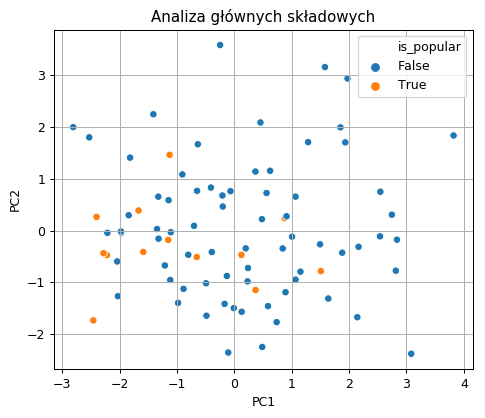

In [86]:
plt.figure(figsize=(6,5))
final = sns.scatterplot(x=final_data.PC1,
                        y=final_data.PC2,
                        hue=final_data.is_popular)
final.set_title('Analiza głównych składowych')
final.grid()

#### Wnioski

Wykres pokazuje, że popularne piosenki nie są zgrupowane w jednym konkretnym miejscu na wykresie ani nie można wyszczególnić ich ze zbioru wszystkich piosenek. Wniosek taki, że najpopularniejsze piosenki nie charakteryzują się podobnymi parametrami.